In [ ]:
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()
from datetime import datetime

In [ ]:
#Importing important libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import matplotlib as plt
import math

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from keras import layers
from keras import models

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [ ]:
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482924,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550011,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689344,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821992,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801656,394024400
...,...,...,...,...,...,...
2023-06-12,181.270004,183.889999,180.970001,183.789993,183.789993,54274900
2023-06-13,182.800003,184.149994,182.440002,183.309998,183.309998,54929100
2023-06-14,183.369995,184.389999,182.020004,183.949997,183.949997,57462900


In [ ]:
#Checking for null values and returning respective totals
print (df.isnull().sum())
total_null = df.isnull().sum().sum()
print ("The total number of null values is: " + str(total_null))

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
The total number of null values is: 0


In [ ]:
#Drop every column except the open, high and low columns
df.drop(['Close', 'Volume', 'Adj Close'], axis = 1, inplace = True)

<Axes: title={'center': 'Apple Stock Prices'}, xlabel='Date'>

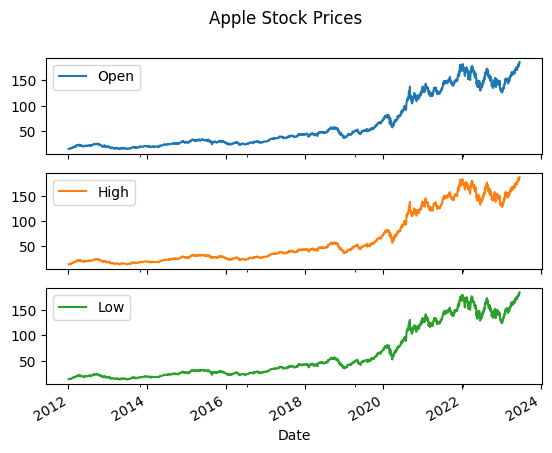

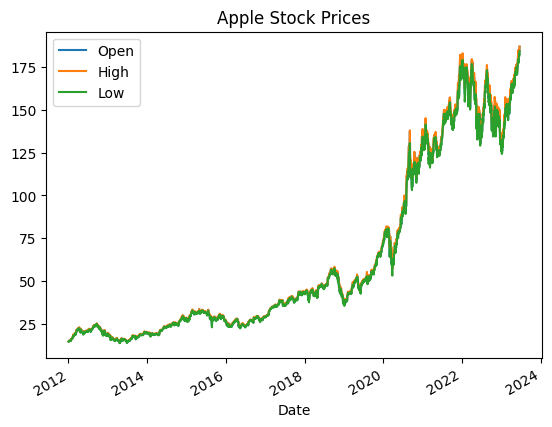

In [ ]:
#Visualize the stock price data
df.plot.line(subplots = True, title='Apple Stock Prices')
df.plot(title='Apple Stock Prices')

In [ ]:
#Drop the high and low columns
df.drop(['High', 'Low'], axis = 1, inplace = True)
#Drop the bottom 2 columns
df.drop(df.tail(2).index,inplace=True)
print(df)
print(df.shape)

                  Open
Date                  
2012-01-03   14.621429
2012-01-04   14.642857
2012-01-05   14.819643
2012-01-06   14.991786
2012-01-09   15.196429
...                ...
2023-06-08  177.899994
2023-06-09  181.500000
2023-06-12  181.270004
2023-06-13  182.800003
2023-06-14  183.369995

[2881 rows x 1 columns]
(2881, 1)


In [ ]:
train_data = df.to_numpy()

In [ ]:
#From the dataset, separate into training and testing data with 80/20 percentile
dataset_train = np.array(train_data[:int(train_data.shape[0]*0.8)])
dataset_test = np.array(train_data[int(train_data.shape[0]*0.8):])
#Find number of columns for each dataset
print(dataset_train.shape)
print(dataset_test.shape)

(2304, 1)
(577, 1)


In [ ]:
#Scale the data to range[0,1]
#MinMaxScalar subtracts the minimum value in each feature and divides by the range(difference between original min and max)
scalar = MinMaxScaler(feature_range = (0,1))
train_data = scalar.fit_transform(dataset_train)
train_data.shape

(2304, 1)

In [ ]:
#Declare the x_train and y_train
x_train = train_data[0:1407]
y_train = train_data[1:1408]

x_train = np.reshape(x_train, (1407,1,1))
x_train.shape

(1407, 1, 1)

In [ ]:
model = Sequential()
model.add(LSTM(units=192, return_sequences=True, input_shape=(None, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=192, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=192, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=192))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 192)         148992    
                                                                 
 dropout (Dropout)           (None, None, 192)         0         
                                                                 
 lstm_1 (LSTM)               (None, None, 192)         295680    
                                                                 
 dropout_1 (Dropout)         (None, None, 192)         0         
                                                                 
 lstm_2 (LSTM)               (None, None, 192)         295680    
                                                                 
 dropout_2 (Dropout)         (None, None, 192)         0         
                                                                 
 lstm_3 (LSTM)               (None, 192)               2

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
44/44 [==============================] - 10s 26ms/step - loss: 0.0031
Epoch 2/20
44/44 [==============================] - 1s 25ms/step - loss: 0.0022
Epoch 3/20
44/44 [==============================] - 1s 25ms/step - loss: 6.0272e-04
Epoch 4/20
44/44 [==============================] - 1s 25ms/step - loss: 5.3469e-05
Epoch 5/20
44/44 [==============================] - 1s 30ms/step - loss: 3.6419e-05
Epoch 6/20
44/44 [==============================] - 2s 37ms/step - loss: 3.9464e-05
Epoch 7/20
44/44 [==============================] - 1s 28ms/step - loss: 3.3916e-05
Epoch 8/20
44/44 [==============================] - 1s 24ms/step - loss: 3.4630e-05
Epoch 9/20
44/44 [==============================] - 1s 24ms/step - loss: 3.2235e-05
Epoch 10/20
44/44 [==============================] - 1s 23ms/step - loss: 3.3065e-05
Epoch 11/20
44/44 [==============================] - 1s 23ms/step - loss: 3.2972e-05
Epoch 12/20
44/44 [==============================] - 1s 24ms/step - loss: 2.9977e

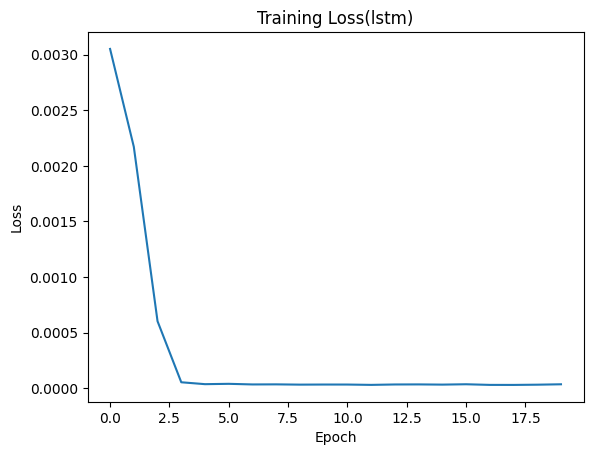

In [ ]:
plt.plot(history.history['loss'])
plt.title('Training Loss(lstm)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
#Display the testing dataset
print(dataset_test.shape)

(577, 1)


In [ ]:
# Reshape the testing data and scale
inputs = np.reshape(scalar.transform(dataset_test), (577, 1, 1))
# Reverse the scaled predictions to their original values
stock_prediction = scalar.inverse_transform(model.predict(inputs))


19/19 [==============================] - 0s 6ms/step


In [ ]:
stock_prediction = np.squeeze(stock_prediction)

In [ ]:
stock_prediction = stock_prediction.reshape(-1,1)


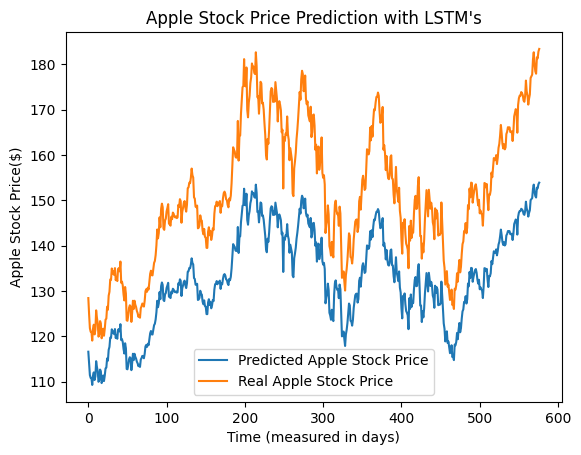

In [ ]:
#Graph the real stock prices against the model's prediction
plt.plot(stock_prediction, label = 'Predicted Apple Stock Price', linewidth = 1.5)
plt.plot(dataset_test, label = 'Real Apple Stock Price', linewidth = 1.5)
plt.title("Apple Stock Price Prediction with LSTM's")
plt.xlabel('Time (measured in days)')
plt.ylabel('Apple Stock Price($)')
plt.legend()
plt.show()

In [ ]:
#Calculate the standard deviation of the residuals
rmse_value = math.sqrt(mean_squared_error(dataset_test, stock_prediction))
rmse_value = round(rmse_value, 3)
print(rmse_value)

18.869


In [ ]:
#Extrapolate the minimum and maximum real stock price values
maxValTest = round(float(max(dataset_test)), 2)
minValTest = round(float(min(dataset_test)), 2)
print ("The real maximum stock price is: " + str(maxValTest) +" dollars")
print ("The real minimum stock price is: " + str(minValTest) + " dollars")

The real maximum stock price is: 183.37 dollars
The real minimum stock price is: 119.03 dollars


In [ ]:

maxValPredict = round(float(max(stock_prediction)), 2)
minValPredict = round(float(min(stock_prediction)), 2)
print ("The predicted maximum stock price is: " + str(maxValPredict) +" dollars")
print ("The predicted minimum stock price is: " + str(minValPredict) +" dollars")

The predicted maximum stock price is: 153.87 dollars
The predicted minimum stock price is: 109.25 dollars


In [ ]:
#Calculate error and model accuracy with MAPE
total = 0
for i, j in zip(dataset_test, stock_prediction):
    value = abs(i - j) / abs(i)
    total += value
error = float(total*100/(len(dataset_test))) #calculate mape
mape = round(error, 1) #round to 3 significant figures
accuracy = 100 - mape #Calculate accuracy
print ("The LSTM's accuracy in predicting the stock price is: " + str(accuracy) + "%")

The LSTM's accuracy in predicting the stock price is: 88.1%


In [ ]:
import tensorflow as tf
model.save("mat_model1.h5")

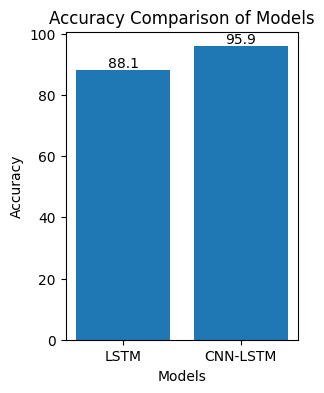

In [7]:
import matplotlib.pyplot as plt

accuracy1 = 88.1
accuracy2 = 95.9

# Create a bar plot to compare accuracy
labels = ['LSTM', 'CNN-LSTM']
accuracy_scores = [accuracy1, accuracy2]
plt.figure(figsize=(3,4))
plt.bar(labels, accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
for i, v in enumerate(accuracy_scores):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()

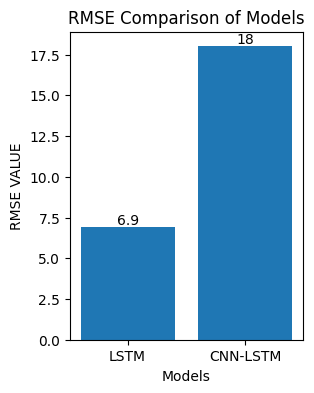

In [8]:
import matplotlib.pyplot as plt

accuracy1 = 6.9
accuracy2 = 18

# Create a bar plot to compare accuracy
labels = ['LSTM', 'CNN-LSTM']
accuracy_scores = [accuracy1, accuracy2]
plt.figure(figsize=(3,4))
plt.bar(labels, accuracy_scores)
plt.xlabel('Models')
plt.ylabel('RMSE VALUE')
plt.title('RMSE Comparison of Models')
for i, v in enumerate(accuracy_scores):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()

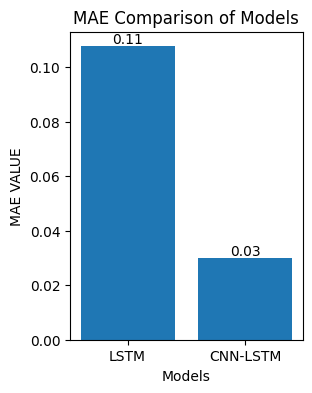

In [9]:
import matplotlib.pyplot as plt

accuracy1 = 0.1077
accuracy2 = 0.030

# Create a bar plot to compare accuracy
labels = ['LSTM', 'CNN-LSTM']
accuracy_scores = [accuracy1, accuracy2]
plt.figure(figsize=(3,4))
plt.bar(labels, accuracy_scores)
plt.xlabel('Models')
plt.ylabel('MAE VALUE')
plt.title('MAE Comparison of Models')
for i, v in enumerate(accuracy_scores):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()